# 10 route problem


Airline Routing Problem Summary
Number of Routes: 10
Number of Flights: 6
Number of Tails: 4

Penalty Coefficients:
  A (Flight Coverage Constraint): 600.0
  B (Tail Assignment Constraint): 300.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 10
  Flight 2: Cf_2 = 9
  Flight 3: Cf_3 = 21
  Flight 4: Cf_4 = 5
  Flight 5: Cf_5 = 9
  Flight 6: Cf_6 = 8

Route Costs:
  Route 1: c_1 = 50
  Route 2: c_2 = 30
  Route 3: c_3 = 20
  Route 4: c_4 = 40
  Route 5: c_5 = 60
  Route 6: c_6 = 25
  Route 7: c_7 = 76
  Route 8: c_8 = 34
  Route 9: c_9 = 89
  Route 10: c_10 = 23

Flight-Route Incidence Matrix (afr):
[[1 0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 1 0 1 0]
 [0 1 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0 1 0 0]]

Tail-Route Incidence Matrix (btr):
[[1 0 0 1 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 1 0 0 1 0]
 [1 0 0 1 0 0 1 0 0 1]]

QUBO Linear Coefficients (h):
[-1769. -1496. -1497. -1791. -1454.  -884. -2364. -2104. -1425. -1796.]

QUBO Coup

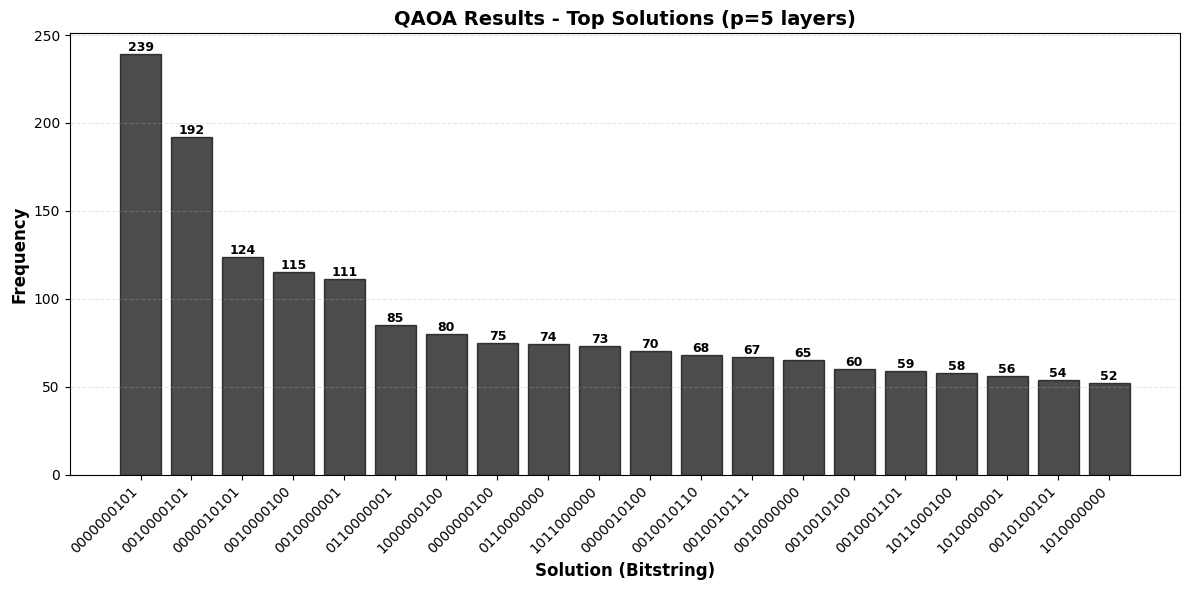


QAOA Histogram Summary
Total unique solutions found: 526
QAOA layers (p): 5


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=5 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [16]:
import numpy as np
from airlines_qaoa import Airlines

# --- 10 Qubit Airlines Dataset ---

afr = np.array([
    # R0 R1 R2 R3 R4 R5 R6 R7 R8 R9
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1], # F0
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], # F1
    [0, 1, 0, 1, 0, 0, 1, 1, 0, 0], # F2
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0], # F3
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 1], # F4
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]  # F5
])

btr = np.array([
    # R0 R1 R2 R3 R4 R5 R6 R7 R8 R9
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1], # Tail 0
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0], # Tail 1
    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0],  # Tail 2
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1], # Tail 3
])


# Parameters for the QAOA Instance
route_costs = [50, 30, 20, 40, 60, 25,76,34,89,23]  # Different costs for each route
penalty_A = 600.0
penalty_B = 300.0
flight_penalties = [10, 9, 21, 5, 9, 8]  # Different penalties for each flight

qaoa = Airlines(afr, btr, route_costs, penalty_A, penalty_B, flight_penalties)

# --- Run QAOA ---
results = qaoa.build_qaoa(p_layers=15)

qaoa.problem_summary()

qaoa.build_qaoa(p_layers=5)
results = qaoa.optimize(p_layers=5, shots=1024)

solutions = qaoa.analyze_results(results['counts'], top_k=5)

qaoa.plot_qaoa_histogram(results, top_k=20)



Simulated Annealing Result:
Best Bitstring: 0000000111
Best Energy: -4762.0000


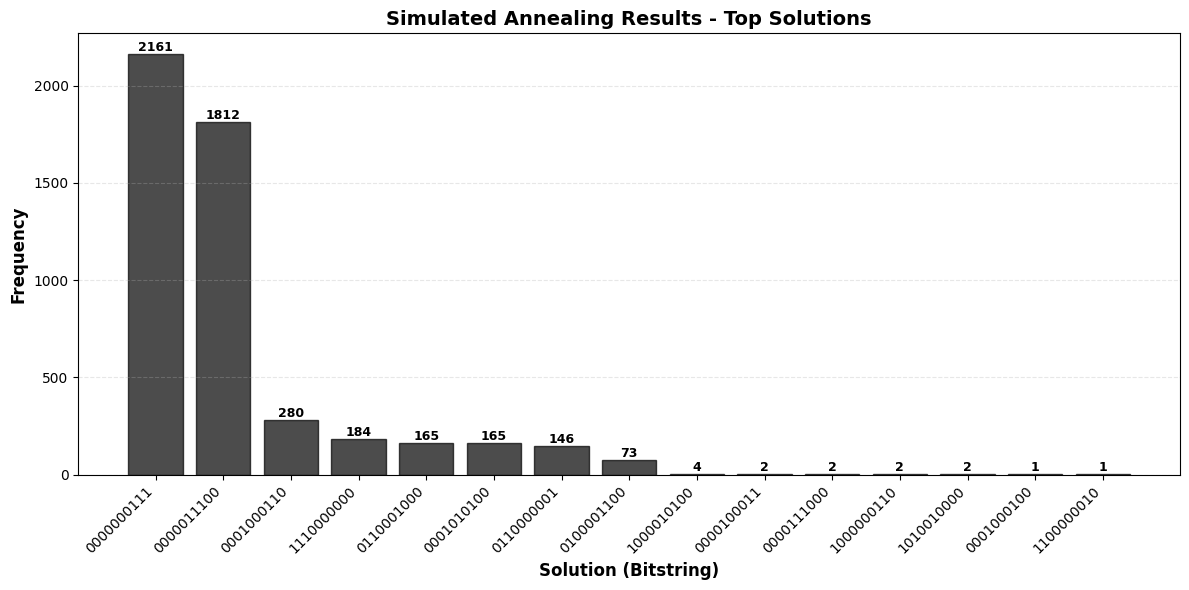


Simulated Annealing Histogram Summary
Total unique solutions found: 15


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [17]:
results = qaoa.simulated_annealing(num_reads=5000)
qaoa.plot_sa_histogram(results, top_k=20)